In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def poisson_gamma(mu,  n):
   
    poisson_samples = np.random.poisson(lam=mu, size=n)
    
    return poisson_samples
import math

def poisson_draws(mu_spec, n):
    """
    Generate n draws from a Poisson distribution with the specified mean (mu_spec).
    
    Parameters:
    mu_spec (float): The mean of the Poisson distribution.
    n (int): The number of draws.
    
    Returns:
    np.ndarray: An array of n Poisson-distributed samples.
    """
    # Draw n samples from the Poisson distribution with the specified mean (mu_spec)
    poisson_samples = np.random.poisson(lam=mu_spec, size=n)
    
    return poisson_samples

Proportion of goals from the Gamma function: 69.46%
Proportion of goals from the Poisson function: 22.05%
Proportion of goals from tie-breaking: 3.38%
Proportion of goals from one-goal difference: 5.11%
Proportion of games that Team 1 wins: 54.87%
Proportion of games that Team 1 Losees by 1 or less: 72.29%
Proportion of games that Team 1 wins: 35.43%
Mean goals scored in total: 6.33489


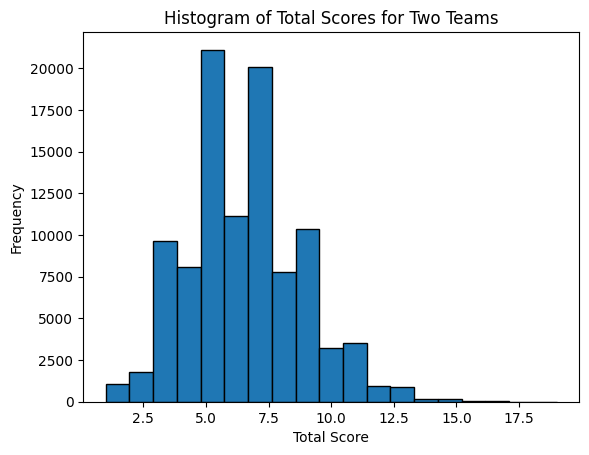

In [3]:
mu_off_home = 0.08
mu_def_home = -0.055

mu_off_away = 0.00
mu_def_away = -0.11

mu_off_SPEC_home = -0.05
mu_def_SPEC_home = 0.05
mu_off_SPEC_away = -0.06
mu_def_SPEC_away = -0.02

home_goalie_val=-0.02
away_goalie_val=0.054
n=100000
# hfa_5v5 = 0.088
# hfa_spec = 0.073
hfa_5v5 = 0
hfa_spec =  0


team1_gamma = poisson_gamma(math.exp(0.67+ mu_off_home -mu_def_away  + hfa_5v5)- away_goalie_val, n)
team1_poisson = poisson_draws(math.exp(-0.409+mu_off_SPEC_home-mu_def_SPEC_away + hfa_spec )+0.08, n)
team1 = team1_gamma + team1_poisson

team2_gamma = poisson_gamma(math.exp(0.67+ mu_off_away-mu_def_home)- home_goalie_val , n)
team2_poisson = poisson_draws(math.exp(-0.409+ mu_off_SPEC_away -mu_def_SPEC_home)+0.08 , n)
team2 = team2_gamma + team2_poisson


# Counters for the effects
one_goal_diff_counter = 0
tie_breaker_counter = 0

# Additional scoring logic
additional_goals_team1 = 0
additional_goals_team2 = 0

# Track goals specifically added by tie-breakers and one-goal difference scenarios
goals_from_tie_breaker = 0
goals_from_one_goal_diff = 0

for i in range(n):
    if (abs(team1[i] - team2[i]) <= 2)&(abs(team1[i] - team2[i]) != 0):
        one_goal_diff_counter += 1
        
        # Generate a random number to decide which event occurs
        random_value = np.random.rand()

        if random_value < 0.14:
            # 15% chance the losing team gets an extra point
            if team1[i] < team2[i]:
                team1[i] += 1
                additional_goals_team1 += 1
                goals_from_one_goal_diff += 1
            else:
                team2[i] += 1
                additional_goals_team2 += 1
                goals_from_one_goal_diff += 1
        elif random_value < 0.60:
            # 40% chance the winning team gets an extra point
            if team1[i] > team2[i]:
                team1[i] += 1
                additional_goals_team1 += 1
                goals_from_one_goal_diff += 1
            else:
                team2[i] += 1
                additional_goals_team2 += 1
                goals_from_one_goal_diff += 1

    # After applying the above logic, if the game is tied, add an additional goal to one of the teams
    # if team1[i] == team2[i]:
    #     tie_breaker_counter += 1
    #     if np.random.rand() < 0.5:
    #         team1[i] += 1
    #         additional_goals_team1 += 1
    #         goals_from_tie_breaker += 1
    #     else:
    #         team2[i] += 1
    #         additional_goals_team2 += 1
    #         goals_from_tie_breaker += 1

    home_lambda_OT = math.exp(0.636+ mu_off_home -mu_def_away  + hfa_5v5)- away_goalie_val
    away_lambda_OT = math.exp(0.636+ mu_off_away-mu_def_home)- home_goalie_val
    home_win_prob_OT = home_lambda_OT/(home_lambda_OT+away_lambda_OT)
    
    if team1[i] == team2[i]:
        tie_breaker_counter += 1
        if np.random.rand() < home_win_prob_OT:
            team1[i] += 1
            additional_goals_team1 += 1
            goals_from_tie_breaker += 1
        else:
            team2[i] += 1
            additional_goals_team2 += 1
            goals_from_tie_breaker += 1
           
        

        

# Calculate total goals from each distribution
total_goals_gamma = np.sum(team1_gamma) + np.sum(team2_gamma)
total_goals_poisson = np.sum(team1_poisson) + np.sum(team2_poisson)
total_additional_goals = additional_goals_team1 + additional_goals_team2
total_goals = total_goals_gamma + total_goals_poisson + total_additional_goals

# Calculate proportions for each goal source
proportion_goals_gamma = total_goals_gamma / total_goals
proportion_goals_poisson = total_goals_poisson / total_goals
proportion_tie_breaker_goals = goals_from_tie_breaker / total_goals
proportion_one_goal_diff_goals = goals_from_one_goal_diff / total_goals

team1_wins = np.sum(team1 > team2)
team1_win_proportion = team1_wins / n
team1_lossesless15 = np.sum(team1+1.5 > team2)/n
team1_winsmore15 = np.sum(team1-1.5 > team2)/n

simulated_total=team1+team2

possible_totals = [5,5.5,6,6.5,7,7.5,8]

prob_over=[]
prob_under=[]

for total in possible_totals:
    prob_over.append(np.mean(simulated_total>total))
    prob_under.append(np.mean(simulated_total<total))

prob_over_norm =[]
for i,total in enumerate(possible_totals):
    prob_over_norm.append(prob_over[i]/(prob_over[i]+prob_under[i]))
    
 

# Print the proportions
print(f"Proportion of goals from the Gamma function: {proportion_goals_gamma:.2%}")
print(f"Proportion of goals from the Poisson function: {proportion_goals_poisson:.2%}")
print(f"Proportion of goals from tie-breaking: {proportion_tie_breaker_goals:.2%}")
print(f"Proportion of goals from one-goal difference: {proportion_one_goal_diff_goals:.2%}")
print(f"Proportion of games that Team 1 wins: {team1_win_proportion:.2%}")
print(f"Proportion of games that Team 1 Losees by 1 or less: {team1_lossesless15:.2%}")
print(f"Proportion of games that Team 1 wins: {team1_winsmore15:.2%}")


# Combine the scores
total_scores = team1 + team2
mean_total = np.mean(total_scores)
print(f"Mean goals scored in total: {mean_total}")

# Number of unique scores
num_scores_possible = len(np.unique(total_scores))

# Plot histogram
plt.hist(total_scores, bins=num_scores_possible, edgecolor='black')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.title('Histogram of Total Scores for Two Teams')
plt.show()


        

In [4]:
prob_over_norm

[0.7390896530744172,
 0.58309,
 0.5308237677245105,
 0.47169,
 0.3388356318674443,
 0.27075,
 0.20917648079467327]

Proportion of goals from the Gamma function: 66.36%
Proportion of goals from the Poisson function: 24.86%
Proportion of goals from tie-breaking: 3.49%
Proportion of goals from one-goal difference: 5.29%
Proportion of games that Team 1 wins: 46.80%
Proportion of games that Team 1 Losees by 1 or less: 65.30%
Mean goals scored in total: 6.173424


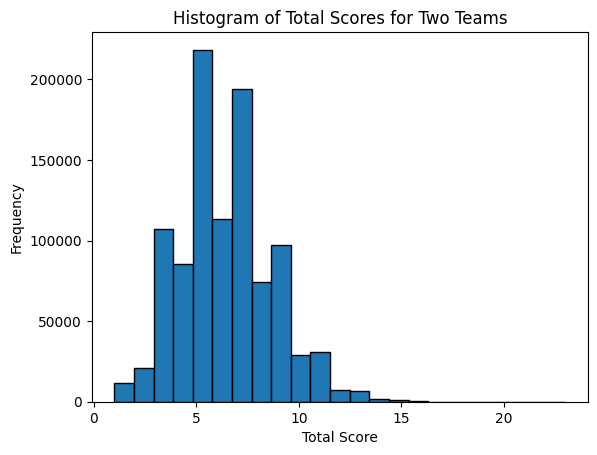

In [22]:
mu_off_home = 0
mu_def_home = 0
mu_off_away = 0
mu_def_away = 0

mu_off_SPEC_home = 0
mu_def_SPEC_home = 0
mu_off_SPEC_away = 0
mu_def_SPEC_away = 0

home_goalie_val=0.03
away_goalie_val=0.03
n=1000000



#home time adv 5v5 = 0.0197*3/2
#home time adv spec = 0.0197*3/2
# home_day_off_adv_5v5 = 0.098/2
# home_day_off_adv_spec = 0.098/2
#away day off adv 5v5 = 0.088*2
#away day off adv spec = 0.088*2


# hfa_5v5 = 0.088
# hfa_spec = 0.073
# hfa_5v5 = 0.0197*3/2


hfa_5v5=0.088
hfa_spec =0.073

home_day_off_adv_5v5 = 0
home_day_off_adv_spec = 0

away_day_off_adv_5v5 = 0.087
away_day_off_adv_spec = 0.073


intercept_5v5=0.686
intercept_spec = -0.412




team1_gamma = poisson_gamma(math.exp(intercept_5v5+ mu_off_home -mu_def_away  + hfa_5v5 + home_day_off_adv_5v5 - away_day_off_adv_5v5)- away_goalie_val, n)
team1_poisson = poisson_draws(math.exp(intercept_spec+mu_off_SPEC_home-mu_def_SPEC_away + hfa_spec -home_day_off_adv_spec + home_day_off_adv_spec -away_day_off_adv_spec)+0.08, n)
team1 = team1_gamma + team1_poisson

team2_gamma = poisson_gamma(math.exp(intercept_5v5+ mu_off_away-mu_def_home - home_day_off_adv_5v5 + away_day_off_adv_5v5)- home_goalie_val , n)
team2_poisson = poisson_draws(math.exp(intercept_spec+ mu_off_SPEC_away -mu_def_SPEC_home - home_day_off_adv_spec + away_day_off_adv_spec)+0.08 , n)
team2 = team2_gamma + team2_poisson


# Counters for the effects
one_goal_diff_counter = 0
tie_breaker_counter = 0

# Additional scoring logic
additional_goals_team1 = 0
additional_goals_team2 = 0

# Track goals specifically added by tie-breakers and one-goal difference scenarios
goals_from_tie_breaker = 0
goals_from_one_goal_diff = 0

for i in range(n):
    if (abs(team1[i] - team2[i]) <= 2)&(abs(team1[i] - team2[i]) != 0):
        one_goal_diff_counter += 1
        
        # Generate a random number to decide which event occurs
        random_value = np.random.rand()

        if random_value < 0.14:
            # 15% chance the losing team gets an extra point
            if team1[i] < team2[i]:
                team1[i] += 1
                additional_goals_team1 += 1
                goals_from_one_goal_diff += 1
            else:
                team2[i] += 1
                additional_goals_team2 += 1
                goals_from_one_goal_diff += 1
        elif random_value < 0.60:
            # 40% chance the winning team gets an extra point
            if team1[i] > team2[i]:
                team1[i] += 1
                additional_goals_team1 += 1
                goals_from_one_goal_diff += 1
            else:
                team2[i] += 1
                additional_goals_team2 += 1
                goals_from_one_goal_diff += 1

    # After applying the above logic, if the game is tied, add an additional goal to one of the teams
    # if team1[i] == team2[i]:
    #     tie_breaker_counter += 1
    #     if np.random.rand() < 0.5:
    #         team1[i] += 1
    #         additional_goals_team1 += 1
    #         goals_from_tie_breaker += 1
    #     else:
    #         team2[i] += 1
    #         additional_goals_team2 += 1
    #         goals_from_tie_breaker += 1

    home_lambda_OT = math.exp(0.67+ mu_off_home -mu_def_away  + hfa_5v5)- away_goalie_val
    away_lambda_OT = math.exp(0.67+ mu_off_away-mu_def_home)- home_goalie_val
    home_win_prob_OT = home_lambda_OT/(home_lambda_OT+away_lambda_OT)
    
    if team1[i] == team2[i]:
        tie_breaker_counter += 1
        if np.random.rand() < home_win_prob_OT:
            team1[i] += 1
            additional_goals_team1 += 1
            goals_from_tie_breaker += 1
        else:
            team2[i] += 1
            additional_goals_team2 += 1
            goals_from_tie_breaker += 1
           
        

        

# Calculate total goals from each distribution
total_goals_gamma = np.sum(team1_gamma) + np.sum(team2_gamma)
total_goals_poisson = np.sum(team1_poisson) + np.sum(team2_poisson)
total_additional_goals = additional_goals_team1 + additional_goals_team2
total_goals = total_goals_gamma + total_goals_poisson + total_additional_goals

# Calculate proportions for each goal source
proportion_goals_gamma = total_goals_gamma / total_goals
proportion_goals_poisson = total_goals_poisson / total_goals
proportion_tie_breaker_goals = goals_from_tie_breaker / total_goals
proportion_one_goal_diff_goals = goals_from_one_goal_diff / total_goals

team1_wins = np.sum(team1 > team2)
team1_lossesless15 = np.sum(team1+1.5 > team2)/n
team1_win_proportion = team1_wins / n

simulated_total=team1+team2

possible_totals = [5,5.5,6,6.5,7,7.5]

prob_over=[]
prob_under=[]

for total in possible_totals:
    prob_over.append(np.mean(simulated_total>total))
    prob_under.append(np.mean(simulated_total<total))
                     
    
    

# Print the proportions
print(f"Proportion of goals from the Gamma function: {proportion_goals_gamma:.2%}")
print(f"Proportion of goals from the Poisson function: {proportion_goals_poisson:.2%}")
print(f"Proportion of goals from tie-breaking: {proportion_tie_breaker_goals:.2%}")
print(f"Proportion of goals from one-goal difference: {proportion_one_goal_diff_goals:.2%}")
print(f"Proportion of games that Team 1 wins: {team1_win_proportion:.2%}")
print(f"Proportion of games that Team 1 Losees by 1 or less: {team1_lossesless15:.2%}")

# Combine the scores
total_scores = team1 + team2
mean_total = np.mean(total_scores)
print(f"Mean goals scored in total: {mean_total}")

# Number of unique scores
num_scores_possible = len(np.unique(total_scores))

# Plot histogram
plt.hist(total_scores, bins=num_scores_possible, edgecolor='black')
plt.xlabel('Total Score')
plt.ylabel('Frequency')
plt.title('Histogram of Total Scores for Two Teams')
plt.show()


        